<a href="https://colab.research.google.com/github/mehedi-4/neural-net-practice/blob/main/sequential-functional-api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [87]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [88]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [89]:
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

##Sequential API

In [90]:
model = keras.Sequential(
    [
        keras.Input(shape=(28 * 28,)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation='softmax'),
    ]
)

# model =  keras.Sequential()
# model.add(keras.Input(shape=(28*28,)))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [91]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [92]:
model.fit(x_train, y_train, epochs=4, batch_size=32)
model.evaluate(x_test, y_test)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9053 - loss: 0.3183
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9747 - loss: 0.0808
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0509
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0359
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9715 - loss: 0.1021


[0.08546780794858932, 0.9757000207901001]

In [105]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


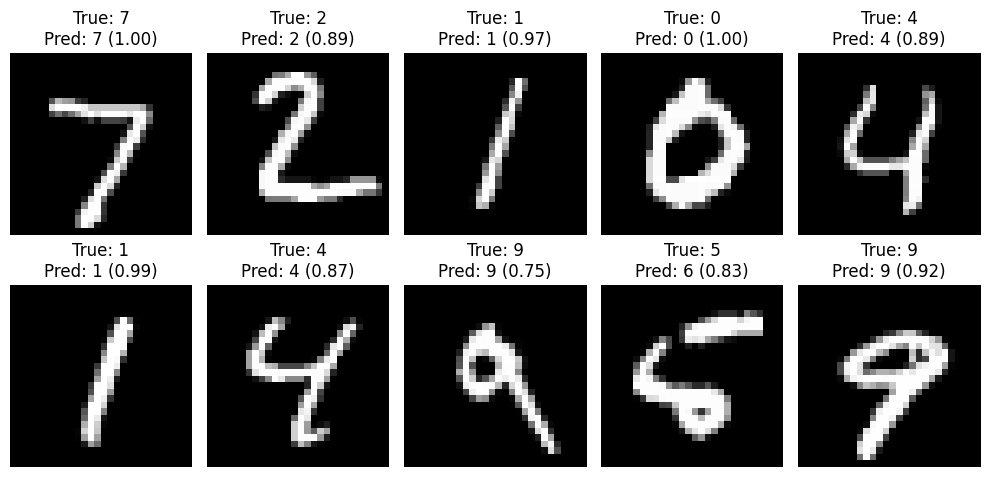

In [107]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    predicted_class = np.argmax(predictions[i])
    predicted_probability = predictions[i][predicted_class]

    plt.title(f"True: {y_test[i]}\nPred: {predicted_class} ({predicted_probability:.2f})")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Functional API

In [94]:
inputs = layers.Input(shape=(28*28,))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [95]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [96]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3367 - loss: 2.0282
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7401 - loss: 1.0439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8084 - loss: 0.7029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8382 - loss: 0.5662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8525 - loss: 0.5085
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8661 - loss: 0.4622
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8725 - loss: 0.4333
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8787 - loss: 0.4110
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8860 - loss: 0.3913
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8915 - loss: 0.3753


In [97]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [98]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9032 - loss: 0.3376


[0.293285071849823, 0.9165999889373779]

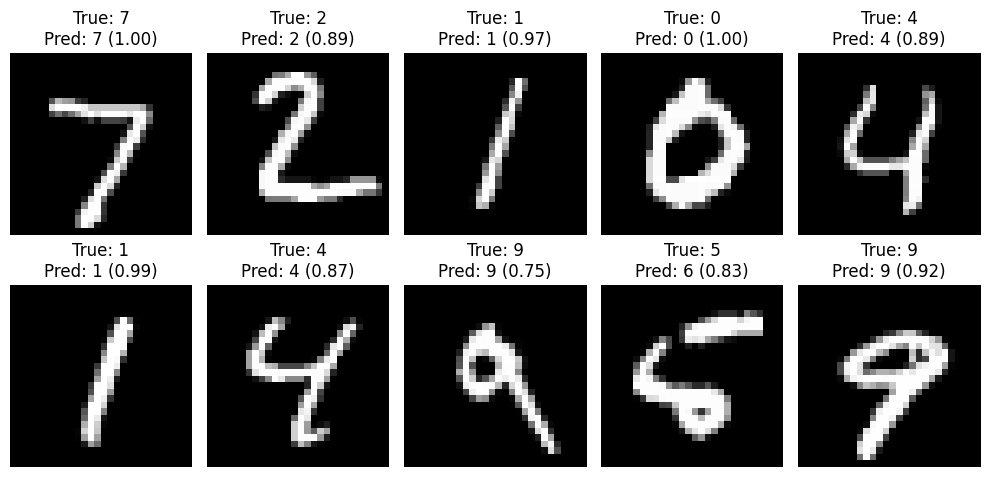

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    predicted_class = np.argmax(predictions[i])
    predicted_probability = predictions[i][predicted_class]

    plt.title(f"True: {y_test[i]}\nPred: {predicted_class} ({predicted_probability:.2f})")
    plt.axis('off')
plt.tight_layout()
plt.show()